Sagaljyot Singh (4364571)

In [1]:
import urllib.parse
import requests
import pprint
import json

In [3]:
# Read the API key from the file
with open("/content/drive/MyDrive/SLC/Sem 4/AI in Marketing/API Key.txt", "r") as file:
    KEY = file.read().replace("\n", "")

In [4]:
def geoCodePlace(place):
    """Returns the geoCodedPlace for the given place"""

    url = "https://maps.googleapis.com/maps/api/geocode/json"
    params = {"address": place, "key": KEY}
    response = requests.get(url, params=urllib.parse.urlencode(params))
    return response.json()

In [5]:

def getPlaceDetails(place_id):
    """Returns the place details for the given place id"""

    url = "https://places.googleapis.com/v1/places/{}".format(place_id)
    params = {
        "fields": "id,displayName,rating,userRatingCount,reviews",
        "key": KEY,
    }
    response = requests.get(url, params=urllib.parse.urlencode(params))
    return response.json()


In [40]:

# Define the place
clubs = ["Stages Nightclub, Kingston, Ontario", "Suits Nightclub, Kingston, Ontario", "Trinity Social, Kingston, Ontario", "The Ale House & Canteen, Kingston, Ontario", "The Vienna House, Kingston, Ontario"]
place_ids = []
# Get the geoCodedPlace
for i in clubs:
  geoCodedPlace = geoCodePlace(i)
  place_ids.append(geoCodedPlace["results"][0]["place_id"])


In [41]:
place_ids

['ChIJwxdETQer0kwRnHOWYjaTiIQ',
 'ChIJp3nkonir0kwRAF6wQ6I7DvU',
 'ChIJmSHfZwer0kwRBQv2HJQy6co',
 'ChIJwxdETQer0kwRd4ROpG7ICxA',
 'ChIJDylrKfar0kwR_2tAsUv-G3k']

In [17]:
import pandas as pd

In [46]:
data = {
    "Nightclub Name":[],
    "publishTime":[],
    "displayName":[],
    "originalText":[],
    "rating":[],
    "sentiment":[],
    "magnitude":[]
}
df = pd.DataFrame(data)

In [47]:
df.head()

,Nightclub Name,publishTime,displayName,originalText,rating,sentiment,magnitude


In [48]:
td = df.copy()

In [42]:
# Imports the Google Cloud client library
from google.cloud import language_v1
import os

In [43]:
# Set the environment variable
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/drive/MyDrive/Colab Notebooks/AI in Marketing/sentiment-w24-ic/service_account.json"

# Instantiates a client
client = language_v1.LanguageServiceClient()

In [50]:
td.head()

,Nightclub Name,publishTime,displayName,originalText,rating,sentiment,magnitude


In [51]:
# Get the place details
c = 0
for i in place_ids:
  placeDetails = getPlaceDetails(i)
  for j in range(5):
    if c < 25:
      text = placeDetails['reviews'][j]["originalText"]["text"]
      document = language_v1.types.Document(content=text, type_=language_v1.types.Document.Type.PLAIN_TEXT)
      # Detects the sentiment of the text
      sentiment = client.analyze_sentiment(request={"document": document}).document_sentiment
      td.at[c, "Nightclub Name"] = placeDetails['displayName']['text']
      td.at[c, "publishTime"] = placeDetails['reviews'][j]['publishTime']
      td.at[c, "displayName"] = placeDetails['reviews'][j]['authorAttribution']['displayName']
      td.at[c, "originalText"] = placeDetails['reviews'][j]['originalText']['text']
      td.at[c, "rating"] = placeDetails['reviews'][j]['rating']
      td.at[c, 'sentiment'] = sentiment.score
      td.at[c, "magnitude"] = sentiment.magnitude
      c += 1
    else:
      break



In [52]:
td

,Nightclub Name,publishTime,displayName,originalText,rating,sentiment,magnitude
0,Stages Nightclub,2023-11-11T07:55:41Z,Hshshs,Bouncer with beard has denied entry of over 6 ...,1.0,-0.8,1.6
1,Stages Nightclub,2023-08-21T17:16:06Z,Samantha Decker,Went in at 11pm paid 10$ for me and my friend ...,1.0,-0.7,3.0
2,Stages Nightclub,2023-11-05T14:00:26Z,Faith MacDonald,RUDE coat check girls wouldn’t give me my coat...,1.0,-0.8,2.5
3,Stages Nightclub,2024-01-20T06:41:46Z,Robert taylor,Went there with the gf and saw the line was do...,1.0,-0.4,0.4
4,Stages Nightclub,2023-01-15T18:25:33Z,Not Applicable,"I’ve been going to this place for 9 years now,...",1.0,-0.4,8.1
5,Suits Nightclub,2023-12-29T08:37:59Z,Jaro Ambeault,"Ouch.\nRude.\nAggressive ""customer"" dudes appa...",1.0,-0.5,4.8
6,Suits Nightclub,2023-07-17T17:59:36Z,Darren Kelly,"My main complaints ware the over priced, but W...",2.0,-0.2,1.9
7,Suits Nightclub,2023-10-26T05:12:10Z,Tjalling Rekker,Great hangout just for the staff (before we ev...,5.0,0.9,2.7
8,Suits Nightclub,2022-12-10T18:59:23Z,Katrina Elizabeth,Such a great spot! Went last night for my bach...,5.0,0.9,4.8
9,Suits Nightclub,2023-10-22T19:36:10Z,Optimus Brine,Had to pay a cover fee to enter. The place see...,1.0,-0.7,1.4


In [53]:
df1 = td.copy()

In [54]:
td.to_csv('Kingston nightclubs reviews.csv', index=False)

In [55]:
senti_mean = td.groupby('Nightclub Name')['sentiment'].mean()
senti_mean

Nightclub Name
Stages Nightclub          -0.62
Suits Nightclub            0.08
TRINITY SOCIAL            -0.28
The Ale House & Canteen   -0.42
The VIENNA House           0.32
Name: sentiment, dtype: float64

In [56]:
magni_mean = td.groupby('Nightclub Name')['magnitude'].mean()
magni_mean

Nightclub Name
Stages Nightclub           3.12
Suits Nightclub            3.12
TRINITY SOCIAL             3.18
The Ale House & Canteen    4.40
The VIENNA House           3.38
Name: magnitude, dtype: float64

In [57]:
import matplotlib.pyplot as plt

Plotting the mean values:

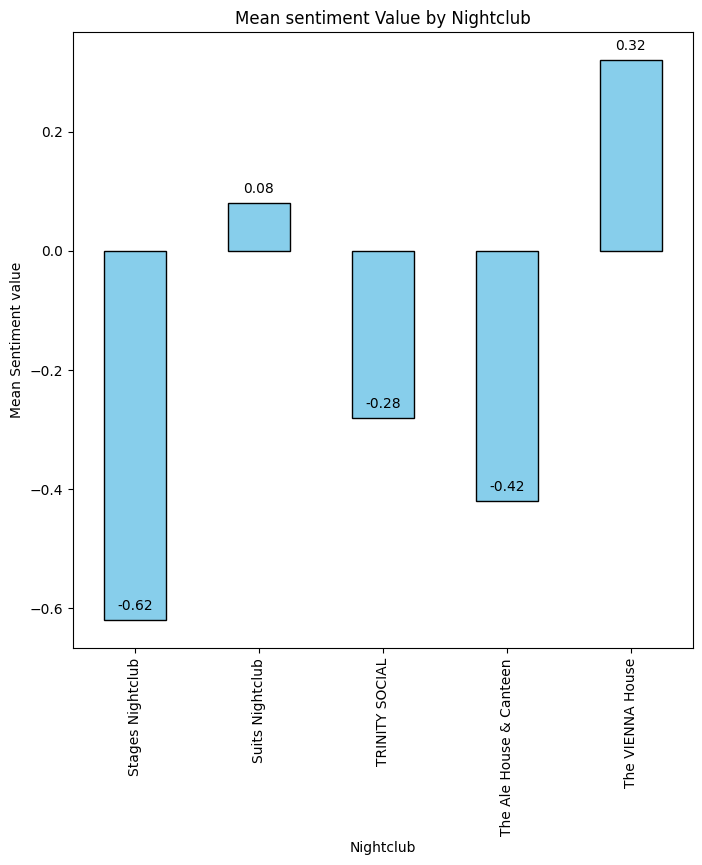

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figsize to your preferred size

# Plotting the bar graph
senti_mean.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Adding labels and title
plt.xlabel('Nightclub')
plt.ylabel('Mean Sentiment value')
plt.title('Mean sentiment Value by Nightclub')

# Displaying the plot
plt.show()

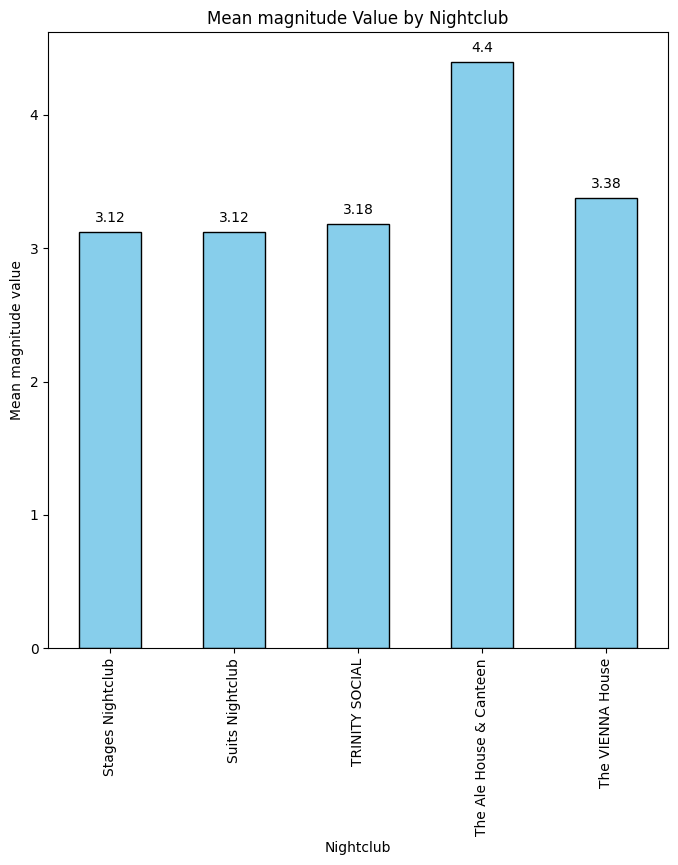

In [67]:
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figsize to your preferred size

# Plotting the bar graph
magni_mean.plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Adding labels and title
plt.xlabel('Nightclub')
plt.ylabel('Mean magnitude value')
plt.title('Mean magnitude Value by Nightclub')

# Displaying the plot
plt.show()

In this project, I am trying to do customer sentiment analysis for the top 5 most famous night clubs in Kingston, Ontario. After capturing the five recent reviews for each nightclub on google map, I performed sentiment analysis on each of those reviews to get sentiment score and magnitude of that sentiment. After finding the average of these measures and plotting the values, it can be observed that Stages nightclub got the most negative reviews from the customers (sentiment score = -0.62) and The VIENNA House got the most positive reviews (sentiment score = 0.32). At an average, Trinity and Ale house also got negative reviews, and Suits stands almost neutral.

Customers showed maximum strength of emotions in the reviews for The Ale House (magnitude = 4.4), and the strength remain almost similar for rest of the nightclubs (~3.20).

Following are the recommendations for the marketing managers of these nightclubs:

Recommendations based on plots:
**Highlight Positive Aspects**:
Suits Nightclub and The VIENNA House have positive sentiment scores. Emphasize the positive aspects of these nightclubs in marketing materials and social media to attract more customers.

**Address Negative Sentiment**:
Stages Nightclub and TRINITY SOCIAL have negative sentiment scores. Consider addressing any issues that may be contributing to the negative sentiment. This could involve improving customer service, addressing complaints, or making positive changes to the overall nightclub experience.

**Focus on Intensity (Magnitude)**:
The Ale House & Canteen has the highest magnitude, indicating strong sentiment, whether positive or negative. Pay attention to the specific feedback and sentiments expressed by customers. If positive, leverage this intensity in marketing campaigns. If negative, identify and address concerns promptly.

Personal recomendations:
**Engage with Customers**:
Actively engage with customers on social media platforms. Respond to reviews, comments, and feedback to show that the nightclubs value customer opinions. This engagement can help build a positive image and address any concerns raised by customers.

**Promotions and Special Events**:
Consider running promotions or special events at Suits Nightclub and The VIENNA House to capitalize on their positive sentiment scores. This could include themed nights, exclusive offers, or partnerships with popular influencers.